In [2]:
import pandas as pd
print(pd.__version__)

1.4.4


In [3]:
df = pd.read_csv('banijay_op1data_ratings_raw.csv', sep = ',', decimal = ".", compression='zip')


In [4]:
# df.to_csv('banijay_op1data_ratings_raw.zip', compression='zip')

In [5]:
print(df.head(5))

   Unnamed: 0       Datum      Time Program Station        Target Group  \
0           0  2020-01-06  22:18:00     op1    npo1            tot6plus   
1           1  2020-01-06  22:18:00     op1    npo1            tot6plus   
2           2  2020-01-06  22:18:00     op1    npo1            tot6plus   
3           3  2020-01-06  22:18:00     op1    npo1  boodschapper_20_49   
4           4  2020-01-06  22:18:00     op1    npo1  boodschapper_20_49   

                  Broadcast Type Ratings Type       Kdh%       Kdh000  \
0  live/prerecorded uitzendingen   uitzenddag   9.676969  1546.863437   
1  live/prerecorded uitzendingen   uitgesteld   1.484044   237.224411   
2  live/prerecorded uitzendingen       totaal  10.299407  1646.360210   
3  live/prerecorded uitzendingen   uitzenddag   3.217735   117.833443   
4  live/prerecorded uitzendingen   uitgesteld   1.146627    41.989484   

       Zadl%  
0  30.881672  
1  24.692727  
2  29.962268  
3  14.746563  
4  17.021271  


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304190 entries, 0 to 1304189
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1304190 non-null  int64  
 1   Datum           1304190 non-null  object 
 2   Time            1304190 non-null  object 
 3   Program         1304190 non-null  object 
 4   Station         1304190 non-null  object 
 5   Target Group    1304190 non-null  object 
 6   Broadcast Type  1304190 non-null  object 
 7   Ratings Type    1304190 non-null  object 
 8   Kdh%            1303316 non-null  float64
 9   Kdh000          1303316 non-null  float64
 10  Zadl%           1251982 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 109.5+ MB


In [7]:
for col in df:
    print(col)

Unnamed: 0
Datum
Time
Program
Station
Target Group
Broadcast Type
Ratings Type
Kdh%
Kdh000
Zadl%


In [8]:
for col in df:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
print(df["Target Group"].unique())

['tot6plus' 'boodschapper_20_49' 'boodschapper_25_54' '6_12_jr' '13_19_jr'
 '20_34_jr' '35_49_jr' '50plus_jr' 'm_6plus_jr' 'v_6plus_jr']


In [10]:
import matplotlib.pyplot as plt


In [11]:
print(df["Kdh000"].head())

0    1546.863437
1     237.224411
2    1646.360210
3     117.833443
4      41.989484
Name: Kdh000, dtype: float64


In [12]:
print(df.dtypes)

Unnamed: 0          int64
Datum              object
Time               object
Program            object
Station            object
Target Group       object
Broadcast Type     object
Ratings Type       object
Kdh%              float64
Kdh000            float64
Zadl%             float64
dtype: object


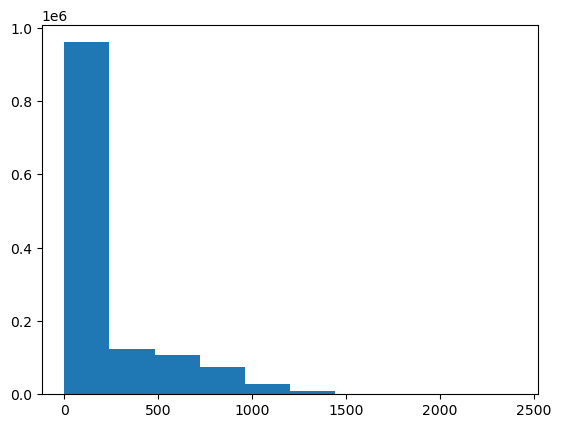

In [13]:
plt.hist(df["Kdh000"])
plt.show()

<AxesSubplot:>

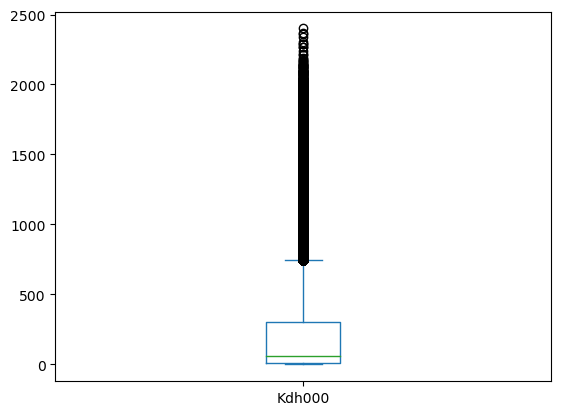

In [14]:
df["Kdh000"].plot(kind = 'box')

In [15]:
df2 = df.set_index("Ratings Type")
df2_t = df2.loc["totaal"]

In [16]:
print(df2_t.head())

              Unnamed: 0       Datum      Time Program Station  \
Ratings Type                                                     
totaal                 2  2020-01-06  22:18:00     op1    npo1   
totaal                 5  2020-01-06  22:18:00     op1    npo1   
totaal                 8  2020-01-06  22:18:00     op1    npo1   
totaal                11  2020-01-06  22:18:00     op1    npo1   
totaal                14  2020-01-06  22:18:00     op1    npo1   

                    Target Group                 Broadcast Type       Kdh%  \
Ratings Type                                                                 
totaal                  tot6plus  live/prerecorded uitzendingen  10.299407   
totaal        boodschapper_20_49  live/prerecorded uitzendingen   3.975244   
totaal        boodschapper_25_54  live/prerecorded uitzendingen   6.271663   
totaal                   6_12_jr  live/prerecorded uitzendingen   1.025859   
totaal                  13_19_jr  live/prerecorded uitzendingen   2.8

array([[<AxesSubplot:title={'center':'13_19_jr'}>,
        <AxesSubplot:title={'center':'20_34_jr'}>,
        <AxesSubplot:title={'center':'35_49_jr'}>],
       [<AxesSubplot:title={'center':'50plus_jr'}>,
        <AxesSubplot:title={'center':'6_12_jr'}>,
        <AxesSubplot:title={'center':'boodschapper_20_49'}>],
       [<AxesSubplot:title={'center':'boodschapper_25_54'}>,
        <AxesSubplot:title={'center':'m_6plus_jr'}>,
        <AxesSubplot:title={'center':'tot6plus'}>],
       [<AxesSubplot:title={'center':'v_6plus_jr'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

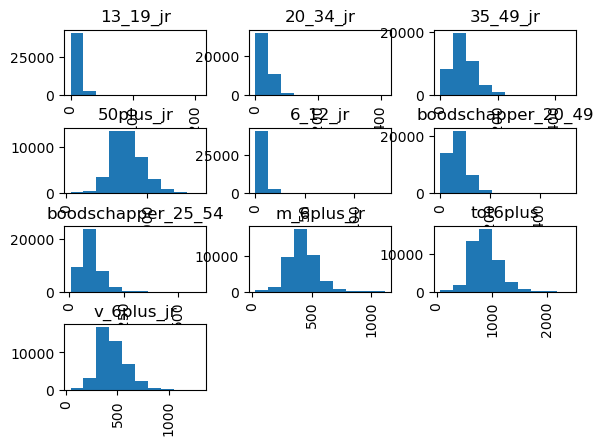

In [17]:
df2_t.hist(column="Kdh000", by="Target Group")


Ratings data preparation


In [18]:
df.isna().sum()

Unnamed: 0            0
Datum                 0
Time                  0
Program               0
Station               0
Target Group          0
Broadcast Type        0
Ratings Type          0
Kdh%                874
Kdh000              874
Zadl%             52208
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.duplicated().sum()

0

In [21]:
df.dtypes

Unnamed: 0          int64
Datum              object
Time               object
Program            object
Station            object
Target Group       object
Broadcast Type     object
Ratings Type       object
Kdh%              float64
Kdh000            float64
Zadl%             float64
dtype: object

In [22]:
df["date_time"] = pd.to_datetime(df["Datum"] + " " + df["Time"])

In [23]:
print(df["date_time"])

0         2020-01-06 22:18:00
1         2020-01-06 22:18:00
2         2020-01-06 22:18:00
3         2020-01-06 22:18:00
4         2020-01-06 22:18:00
                  ...        
1304185   2022-10-20 23:52:00
1304186   2022-10-20 23:52:00
1304187   2022-10-20 23:52:00
1304188   2022-10-20 23:52:00
1304189   2022-10-20 23:52:00
Name: date_time, Length: 1251982, dtype: datetime64[ns]


In [24]:
df.to_csv('banijay_op1data_ratings_raw.zip', compression='zip')

Linking Content Data to Ratings Data

In [25]:
df_c= pd.read_csv('banijay_op1data_content_processed.csv')

In [26]:
df_c["date_time_end"] = df_c["date"] + " " + df_c["end"]
df_c["date_time_start"] = df_c["date"] + " " + df_c["start"]


df_c["date_time_end"] = pd.to_datetime(df_c["date_time_end"],format='%d-%m-%Y %H:%M:%S')
df_c["date_time_start"] = pd.to_datetime(df_c["date_time_start"],format='%d-%m-%Y %H:%M:%S')
df["date_time"] = pd.to_datetime(df["date_time"],format='%d-%m-%Y %H:%M:%S')


# df_c["date_time_end"] = pd.to_datetime(df_c["date_time_end"],infer_datetime_format=True)
# df_c["date_time_start"] = pd.to_datetime(df_c["date_time_start"],infer_datetime_format=True)


In [27]:
dt = "2020-01-06 22:24:00"
df_c.loc[(df_c["date_time_start"] <= dt) & (df_c["date_time_end"] >= dt)]

,Unnamed: 0,date,hosts,id,length,start,end,title,summary,keywords,date_time_start,date_time_end,show_id,fragment
496,496,06-01-2020,"['Veenhoven, Willemijn', 'Dijkstra, Erik']",OP1__________-WON02072823_01,00:14:31,22:23:38,22:38:09,"Minister van Defensie Ank Bijleveld: ""Nederlan...",De dood van de Iraanse generaal Soleimani door...,"['spanningen', 'iraanse', 'generaal']",2020-01-06 22:23:38,2020-01-06 22:38:09,OP1__________-WON02072823,1


In [28]:
arr = []
for x in df["date_time"]:
  fragment =  df_c.loc[(df_c["date_time_start"] < x) & (df_c["date_time_end"] > x)]


  if fragment.shape[0] == 0 :
      arr.append(None)
  else:
       arr.append(fragment.iloc[0]["id"])


In [43]:
df["id"] = pd.Series(arr).values
df.to_csv("banijay_content_ratings_lookuptable.csv", sep=";")

In [30]:
print(df["content_id"].isna().sum())

223462


In [31]:
df.shape

(1251982, 13)

In [32]:
df_c.shape

(2984, 14)

In [33]:
df_all = pd.merge(df_c, df, left_on = "id", right_on= "content_id", how="left")

In [34]:
df_all.shape

(1028578, 27)

In [44]:
df_merged = pd.merge(df, df_c, how = 'left', on = "id")

In [47]:
df_merged.shape

(1251982, 27)

In [50]:
df_merged.isna().sum()

Unnamed: 0_x            0
Datum                   0
Time                    0
Program                 0
Station                 0
Target Group            0
Broadcast Type          0
Ratings Type            0
Kdh%                    0
Kdh000                  0
Zadl%                   0
date_time               0
content_id         223462
id                 223462
Unnamed: 0_y       223462
date               223462
hosts              223462
length             223462
start              223462
end                223462
title              223462
summary            223462
keywords           223462
date_time_start    223462
date_time_end      223462
show_id            223462
fragment           223462
dtype: int64

In [37]:
df_all[["show_id", "fragment","content_id", "date_time_start", "date_time_end", "date_time"]].head()

,show_id,fragment,content_id,date_time_start,date_time_end,date_time
0,OP1__________-WON02197428,1,OP1__________-WON02197428_01,2021-02-01 22:20:11,2021-02-01 22:41:32,2021-02-01 22:21:00
1,OP1__________-WON02197428,1,OP1__________-WON02197428_01,2021-02-01 22:20:11,2021-02-01 22:41:32,2021-02-01 22:21:00
2,OP1__________-WON02197428,1,OP1__________-WON02197428_01,2021-02-01 22:20:11,2021-02-01 22:41:32,2021-02-01 22:21:00
3,OP1__________-WON02197428,1,OP1__________-WON02197428_01,2021-02-01 22:20:11,2021-02-01 22:41:32,2021-02-01 22:21:00
4,OP1__________-WON02197428,1,OP1__________-WON02197428_01,2021-02-01 22:20:11,2021-02-01 22:41:32,2021-02-01 22:21:00


In [38]:
df_all.columns

Index(['Unnamed: 0_x', 'date', 'hosts', 'id', 'length', 'start', 'end',
       'title', 'summary', 'keywords', 'date_time_start', 'date_time_end',
       'show_id', 'fragment', 'Unnamed: 0_y', 'Datum', 'Time', 'Program',
       'Station', 'Target Group', 'Broadcast Type', 'Ratings Type', 'Kdh%',
       'Kdh000', 'Zadl%', 'date_time', 'content_id'],
      dtype='object')

In [39]:
df_all.to_csv('banijay_op1data_content_ratings.csv', compression = 'zip' )


In [40]:
# look_table = pd.read_csv("banijay_content_ratings_lookuptable.csv", sep=";")

In [41]:
# look_table.to_csv('banijay_content_ratings_lookuptable.csv', compression = 'zip' )